In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import psycopg2
import getpass

In [9]:
%matplotlib inline
plt.style.use('ggplot') 

In [10]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [11]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

In [12]:
# Get length of stay from the icustays table
query = \
"""
select l.subject_id ,count(distinct(charttime)) as lab_time_count
    from mimiciii.labevents l inner join
    mimiciii.admissions a on
    a.subject_id = l.subject_id
    where a.admission_type not like 'NEWBORN'
    group by l.subject_id
"""

data = pd.read_sql_query(query,con)

In [13]:
# Display the first few rows of the data
data.head(150)

,subject_id,lab_time_count
0,3,138
1,4,88
2,6,81
3,9,35
4,11,38
5,12,63
6,13,51
7,17,54
8,18,16
9,19,8


In [14]:
#diagnoses = data.plot.barh(y='lab_time_count', figsize=(5, 5), color='blue')

In [15]:
#plot = data.plot.pie(y='lab_time_count', figsize=(5, 5), legend=False, autopct='%1.1f%%')

In [16]:
Total = sum(data.lab_time_count)
print Total

1983240


In [17]:
data['lab_time_count'].mean()

51.06442144291673

In [18]:
data['lab_time_count'].median()

29.0

In [33]:
data['lab_time_count'].quantile([.1, .25, .5, .75, .9])

0.10      7.00
0.25     14.00
0.50     29.00
0.75     58.75
0.90    117.00
Name: lab_time_count, dtype: float64

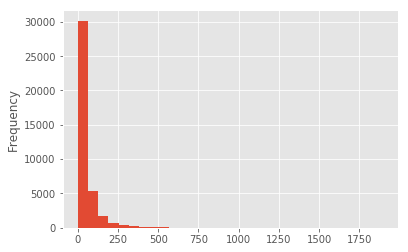

In [31]:
data['lab_time_count'].plot(kind='hist', bins = 30)